<a href="https://colab.research.google.com/github/rahiakela/transformers-research-and-practice/blob/main/layout-lm-v3-works/01_document_classification_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [ ]:
!pip install -qqq transformers==4.20.1 --progress-bar off
!pip install -qqq pytorch-lightning==1.6.4 --progress-bar off
!pip install -qqq selenium --progress-bar off
!pip install -qqq Selenium-Screenshot --progress-bar off
!pip install -qqq Pillow==9.0.1 --progress-bar off
!pip install -qqq pytesseract --progress-bar off

In [ ]:
!apt-get -qq update > /dev/null
!apt-get -qq install chromium-chromedriver > /dev/null
!apt-get -qq install tesseract-ocr > /dev/null

In [ ]:
!gdown 1tMZXonmajLPK9zhZ2dt-CdzRTs5YfHy0
!unzip -q financial-documents.zip
!mv "TableClassifierQuaterlyWithNotes" "documents"

Downloading...
From: https://drive.google.com/uc?id=1tMZXonmajLPK9zhZ2dt-CdzRTs5YfHy0
To: /content/financial-documents.zip
100% 3.10M/3.10M [00:00<00:00, 189MB/s]


In [ ]:
from transformers import LayoutLMv3FeatureExtractor, LayoutLMv3TokenizerFast, LayoutLMv3Processor, LayoutLMv3ForSequenceClassification
from selenium import webdriver
from Screenshot import Screenshot
from PIL import Image, ImageDraw
import numpy as np
import time
from tqdm import tqdm
import sys
from pathlib import Path

%matplotlib inline
sys.path.insert(0, '/usr/lib/chromium-browser/chromiumdriver')

## Data

In [ ]:
list(Path("documents").glob("*"))

[PosixPath('documents/Income Statement'),
 PosixPath('documents/Others'),
 PosixPath('documents/Balance Sheets'),
 PosixPath('documents/Notes'),
 PosixPath('documents/Cash Flow')]

In [ ]:
for dir in Path("documents").glob("*"):
  dir.rename(str(dir).lower().replace(" ", "_"))

In [ ]:
list(Path("documents").glob("*"))

[PosixPath('documents/notes'),
 PosixPath('documents/balance_sheets'),
 PosixPath('documents/others'),
 PosixPath('documents/income_statement'),
 PosixPath('documents/cash_flow')]

In [ ]:
from os.path import exists
for dir in Path("documents").glob("*"):
  image_dir = Path(f"images/{dir.name}")
  image_dir.mkdir(exist_ok=True, parents=True)

In [ ]:
list(Path("images").glob("*"))

[PosixPath('images/notes'),
 PosixPath('images/balance_sheets'),
 PosixPath('images/others'),
 PosixPath('images/income_statement'),
 PosixPath('images/cash_flow')]

## HTML to PNG

In [ ]:
def create_chrome_driver() -> webdriver.Chrome:
  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  return webdriver.Chrome(options=chrome_options)

In [ ]:
driver = create_chrome_driver()
driver

<selenium.webdriver.chrome.webdriver.WebDriver (session="9d269a84bf19e89f343d4f1c9969ebf8")>

In [ ]:
ob = Screenshot.Screenshot()
#driver = webdriver.Chrome()
url = "https://github.com/sam4u3/Selenium_Screenshot/tree/master/test"
driver.get(url)
img_url = ob.full_screenshot(driver, save_path=r'.', image_name='myimage.png', is_load_at_runtime=True,
                                          load_wait_time=3)
print(img_url)

/content/myimage.png


In [ ]:
!rm -rf images/notes/*

In [ ]:
# https://pypi.org/project/Selenium-Screenshot/
def convert_html_to_image(driver: webdriver.Chrome, file_path: Path, image_dir: Path) -> Path:
  driver.get(f"file://content/{str(file_path)}")

  shot = Screenshot.Screenshot()
  img_url = shot.full_screenshot(
      driver,
      save_path=f"{str(image_dir)}/{file_path.parent.name}",
      image_name=file_path.with_suffix(".png").name,
      is_load_at_runtime=True,
      load_wait_time=3
  )
  return Path(img_url)

In [ ]:
list(Path("documents").glob("*/*"))[:5]

[PosixPath('documents/notes/18989758_table_127.html'),
 PosixPath('documents/notes/18793895_table_214.html'),
 PosixPath('documents/notes/18599651_table_185.html'),
 PosixPath('documents/notes/18646845_table_93.html'),
 PosixPath('documents/notes/18646845_table_60.html')]

In [ ]:
documents_path = list(Path("documents").glob("*/*"))[:10]
for doc_path in tqdm(documents_path):
  convert_html_to_image(driver, doc_path, Path("images"))

100%|██████████| 10/10 [00:51<00:00,  5.17s/it]


In [ ]:
list(Path("images").glob("*/*"))[:5]

[PosixPath('images/notes/18599651_table_185.png'),
 PosixPath('images/notes/19034589_table_69.png'),
 PosixPath('images/notes/19005595_table_237.png'),
 PosixPath('images/notes/18646845_table_93.png'),
 PosixPath('images/notes/18646845_table_60.png')]

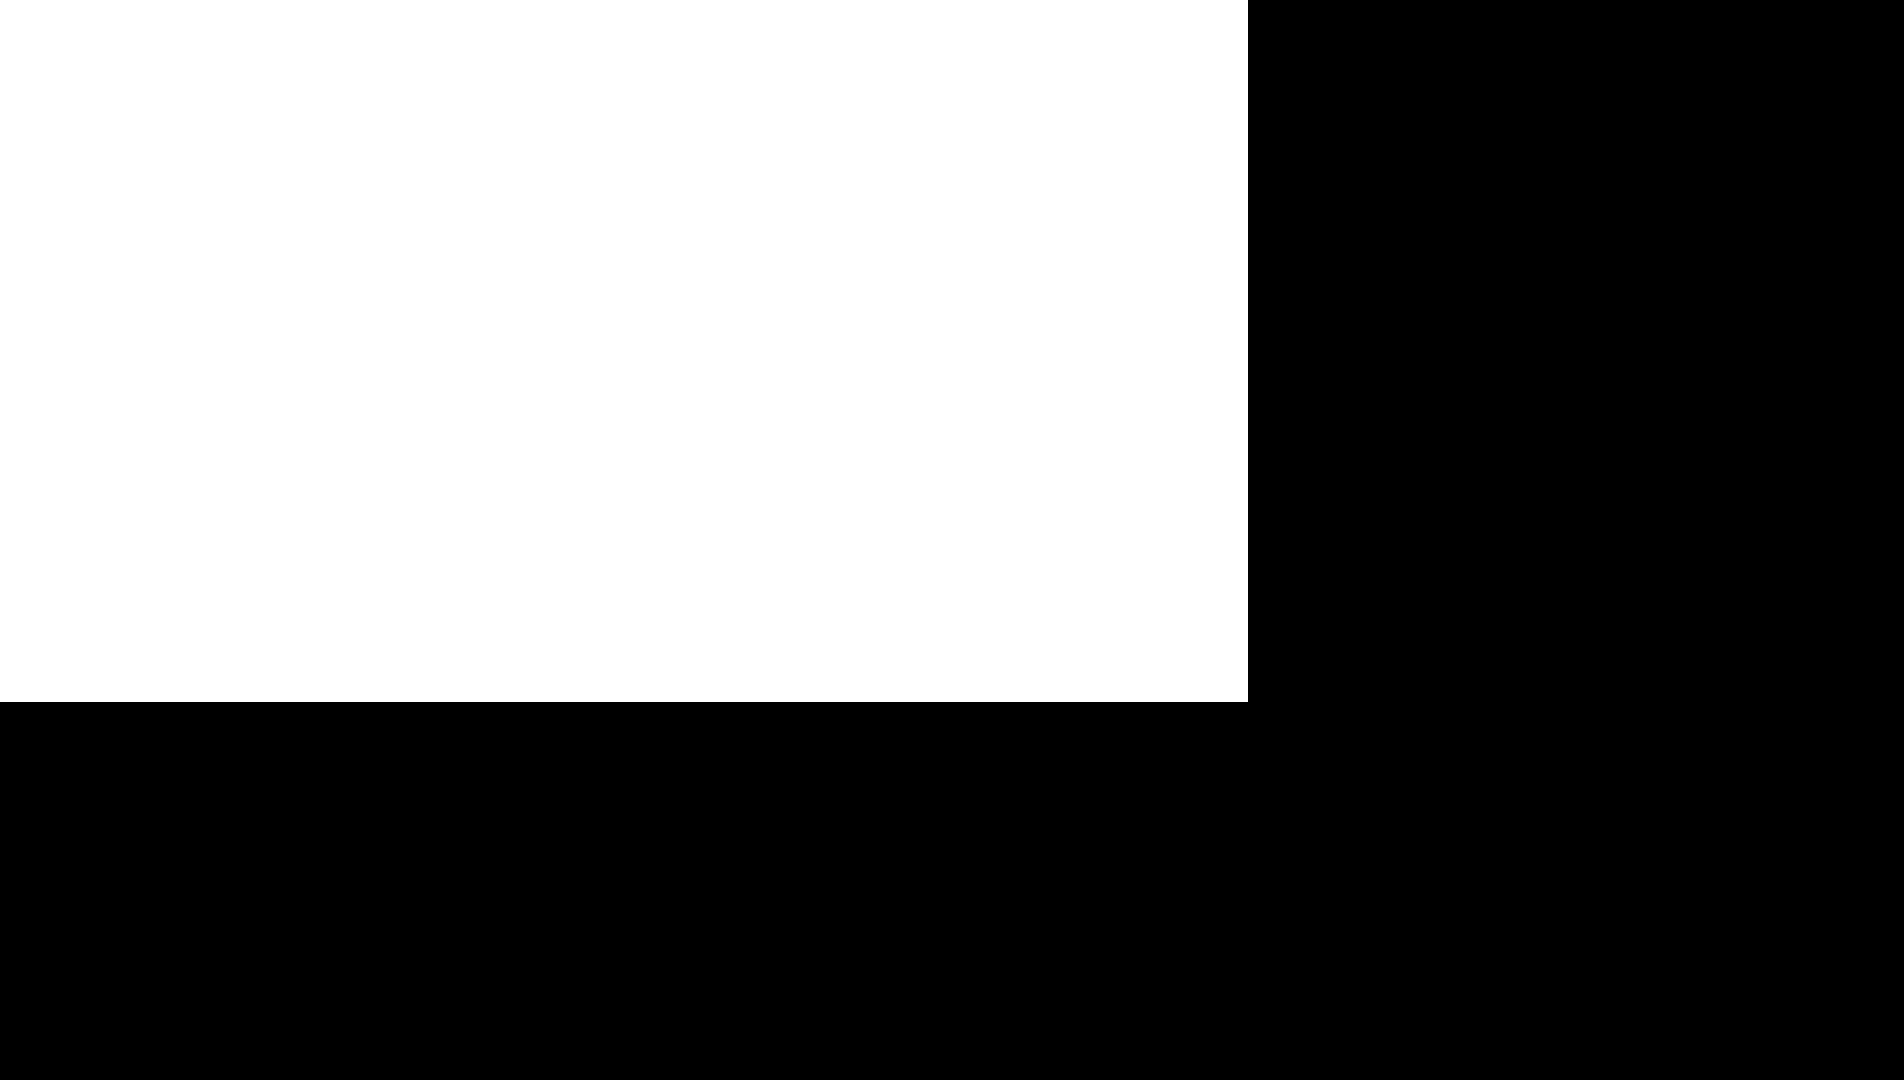

In [ ]:
image_paths = list(Path("images").glob("*/*"))

image = Image.open(image_paths[3]).convert("RGB")
image

In [ ]:
image_paths

[PosixPath('images/notes/18599651_table_185.png'),
 PosixPath('images/notes/19034589_table_69.png'),
 PosixPath('images/notes/19005595_table_237.png'),
 PosixPath('images/notes/18646845_table_93.png'),
 PosixPath('images/notes/18646845_table_60.png'),
 PosixPath('images/notes/18612942_table_33.png'),
 PosixPath('images/notes/18630222_table_81.png'),
 PosixPath('images/notes/18793895_table_214.png'),
 PosixPath('images/notes/18989758_table_127.png'),
 PosixPath('images/notes/18599651_table_177.png')]